In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime

In [2]:
crime_df = pd.read_csv("Resources/2022.csv")
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12789250,JF351068,01/01/2022 12:00:00 AM,079XX S ST LAWRENCE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,6.0,44,06,1181612.0,1852489.0,2022,11/12/2022 03:46:21 PM,41.750462,-87.610059,"(41.75046233, -87.610058986)"
1,12783300,JF343908,01/01/2022 12:00:00 AM,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
2,12814497,JF380963,01/01/2022 12:00:00 AM,047XX W WABANSIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE - GARAGE,False,True,...,37.0,25,17,1144610.0,1910885.0,2022,11/12/2022 03:46:21 PM,41.911483,-87.744185,"(41.911482929, -87.744185282)"
3,12822046,JF389504,01/01/2022 12:00:00 AM,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
4,12836994,JF403613,01/01/2022 12:00:00 AM,042XX W WASHINGTON BLVD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,28.0,26,08B,1148076.0,1900155.0,2022,11/12/2022 03:46:21 PM,41.881973,-87.731729,"(41.881972634, -87.731728591)"


In [3]:
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [4]:
crime_df.isnull().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     621
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            1509
Y Coordinate            1509
Year                       0
Updated On                 0
Latitude                1509
Longitude               1509
Location                1509
dtype: int64

In [5]:
null_columns = crime_df[crime_df.columns[crime_df.isna().any()]]
null_columns

,Location Description,Ward,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,RESIDENCE,6.0,1181612.0,1852489.0,41.750462,-87.610059,"(41.75046233, -87.610058986)"
1,STREET,42.0,1177293.0,1905597.0,41.896294,-87.624280,"(41.896293625, -87.624279611)"
2,RESIDENCE - GARAGE,37.0,1144610.0,1910885.0,41.911483,-87.744185,"(41.911482929, -87.744185282)"
3,APARTMENT,46.0,1170694.0,1926410.0,41.953553,-87.647905,"(41.953552585, -87.647905229)"
4,RESIDENCE,28.0,1148076.0,1900155.0,41.881973,-87.731729,"(41.881972634, -87.731728591)"
...,...,...,...,...,...,...,...
220545,TAVERN / LIQUOR STORE,23.0,1150629.0,1865174.0,41.785931,-87.723266,"(41.785930664, -87.723266186)"
220546,APARTMENT,4.0,1182936.0,1875860.0,41.814564,-87.604481,"(41.814563821, -87.604481355)"
220547,STREET,27.0,1151546.0,1905984.0,41.897901,-87.718833,"(41.897900553, -87.718833412)"
220548,STREET,6.0,1168578.0,1856355.0,41.761362,-87.657710,"(41.761361892, -87.657710237)"


In [6]:
print(crime_df['Primary Type'].value_counts()['SEX OFFENSE'])
print(crime_df['Description'].value_counts()['CHILD ABUSE'])

1117
518


In [7]:
crime_df['Description'].value_counts()

SIMPLE                      25564
OVER $500                   18770
$500 AND UNDER              17543
DOMESTIC BATTERY SIMPLE     17505
AUTOMOBILE                  15537
                            ...  
SECOND DEGREE MURDER            1
COMPOUNDING A CRIME             1
CANNABIS PLANT                  1
GAME / AMUSEMENT DEVICE         1
VIOLATION OF SMOKING BAN        1
Name: Description, Length: 278, dtype: int64

In [8]:
crime_df['Case Number'].value_counts()

JF198311    3
JF445443    3
JF356096    3
JF390178    2
JF119102    2
           ..
JF240612    1
JF239717    1
JF247660    1
JF239270    1
JF502215    1
Name: Case Number, Length: 220510, dtype: int64

In [10]:
crime_df['Date'].min()

'01/01/2022 01:00:00 AM'

In [11]:
crime_df.dropna(inplace=True)

In [12]:
crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12789250,JF351068,01/01/2022 12:00:00 AM,079XX S ST LAWRENCE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,6.0,44,06,1181612.0,1852489.0,2022,11/12/2022 03:46:21 PM,41.750462,-87.610059,"(41.75046233, -87.610058986)"
1,12783300,JF343908,01/01/2022 12:00:00 AM,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
2,12814497,JF380963,01/01/2022 12:00:00 AM,047XX W WABANSIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE - GARAGE,False,True,...,37.0,25,17,1144610.0,1910885.0,2022,11/12/2022 03:46:21 PM,41.911483,-87.744185,"(41.911482929, -87.744185282)"
3,12822046,JF389504,01/01/2022 12:00:00 AM,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
4,12836994,JF403613,01/01/2022 12:00:00 AM,042XX W WASHINGTON BLVD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,...,28.0,26,08B,1148076.0,1900155.0,2022,11/12/2022 03:46:21 PM,41.881973,-87.731729,"(41.881972634, -87.731728591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220545,12915874,JF502169,12/07/2022 11:50:00 PM,040XX W 59TH ST,0860,THEFT,RETAIL THEFT,TAVERN / LIQUOR STORE,False,False,...,23.0,65,06,1150629.0,1865174.0,2022,12/14/2022 03:49:33 PM,41.785931,-87.723266,"(41.785930664, -87.723266186)"
220546,12915875,JF502171,12/07/2022 11:51:00 PM,044XX S DREXEL BLVD,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,False,True,...,4.0,39,04B,1182936.0,1875860.0,2022,12/14/2022 03:49:33 PM,41.814564,-87.604481,"(41.814563821, -87.604481355)"
220547,12917956,JF502185,12/07/2022 11:52:00 PM,009XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,27.0,23,08B,1151546.0,1905984.0,2022,12/14/2022 03:49:33 PM,41.897901,-87.718833,"(41.897900553, -87.718833412)"
220548,12915844,JF502180,12/07/2022 11:58:00 PM,013XX W 73RD ST,2091,NARCOTICS,FORFEIT PROPERTY,STREET,True,False,...,6.0,67,18,1168578.0,1856355.0,2022,12/14/2022 03:49:33 PM,41.761362,-87.657710,"(41.761361892, -87.657710237)"


In [13]:
crime_df['Date'].dtypes

dtype('O')

In [14]:
crime_df.set_index('Date', inplace = True)
crime_df

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2022 12:00:00 AM,12789250,JF351068,079XX S ST LAWRENCE AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,624,...,6.0,44,06,1181612.0,1852489.0,2022,11/12/2022 03:46:21 PM,41.750462,-87.610059,"(41.75046233, -87.610058986)"
01/01/2022 12:00:00 AM,12783300,JF343908,007XX N MICHIGAN AVE,0580,STALKING,SIMPLE,STREET,False,False,1833,...,42.0,8,08A,1177293.0,1905597.0,2022,11/12/2022 03:46:21 PM,41.896294,-87.624280,"(41.896293625, -87.624279611)"
01/01/2022 12:00:00 AM,12814497,JF380963,047XX W WABANSIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE - GARAGE,False,True,2533,...,37.0,25,17,1144610.0,1910885.0,2022,11/12/2022 03:46:21 PM,41.911483,-87.744185,"(41.911482929, -87.744185282)"
01/01/2022 12:00:00 AM,12822046,JF389504,039XX N PINE GROVE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,1925,...,46.0,6,11,1170694.0,1926410.0,2022,11/12/2022 03:46:21 PM,41.953553,-87.647905,"(41.953552585, -87.647905229)"
01/01/2022 12:00:00 AM,12836994,JF403613,042XX W WASHINGTON BLVD,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,1114,...,28.0,26,08B,1148076.0,1900155.0,2022,11/12/2022 03:46:21 PM,41.881973,-87.731729,"(41.881972634, -87.731728591)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/07/2022 11:50:00 PM,12915874,JF502169,040XX W 59TH ST,0860,THEFT,RETAIL THEFT,TAVERN / LIQUOR STORE,False,False,813,...,23.0,65,06,1150629.0,1865174.0,2022,12/14/2022 03:49:33 PM,41.785931,-87.723266,"(41.785930664, -87.723266186)"
12/07/2022 11:51:00 PM,12915875,JF502171,044XX S DREXEL BLVD,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,False,True,221,...,4.0,39,04B,1182936.0,1875860.0,2022,12/14/2022 03:49:33 PM,41.814564,-87.604481,"(41.814563821, -87.604481355)"
12/07/2022 11:52:00 PM,12917956,JF502185,009XX N LAWNDALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1112,...,27.0,23,08B,1151546.0,1905984.0,2022,12/14/2022 03:49:33 PM,41.897901,-87.718833,"(41.897900553, -87.718833412)"


C:\Users\amudd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


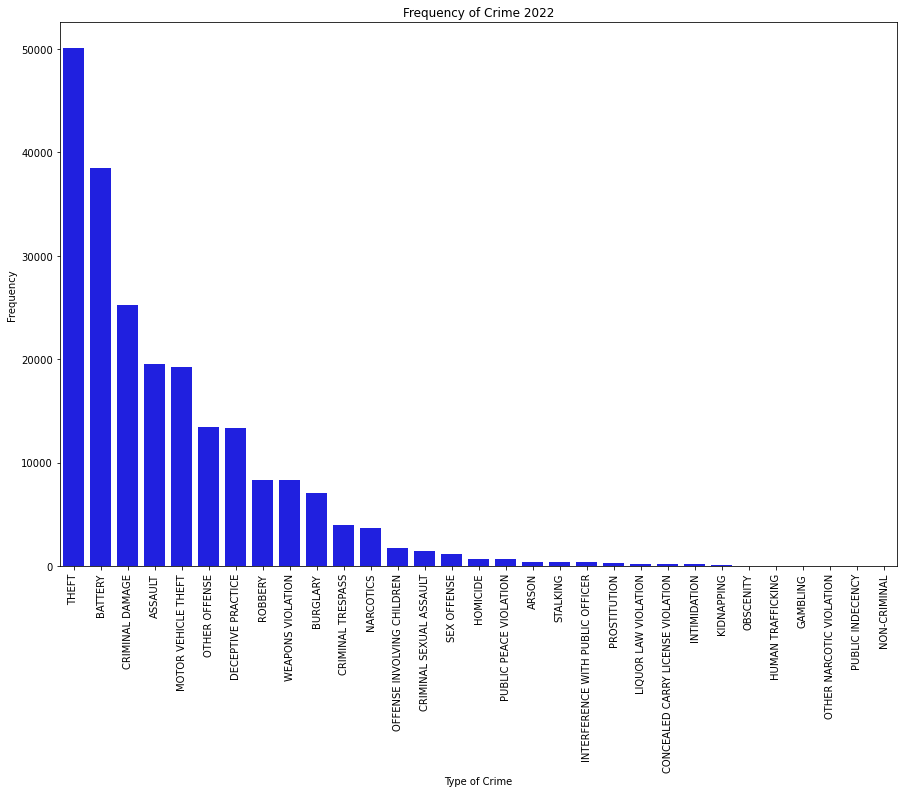

In [15]:
crime_count = crime_df["Primary Type"].value_counts()
# Add labels to the plot
figure = plt.figure(figsize=(15,10))

sns.barplot(crime_count.index, crime_count.values, color='b', ax = figure.gca())

plt.title('Frequency of Crime 2022')
plt.xlabel('Type of Crime')
plt.xticks(rotation=90)
plt.ylabel('Frequency')

plt.show()

In [32]:
loc_crime = crime_df['Location Description'].value_counts()
loc_crime

STREET                                    62633
APARTMENT                                 41732
RESIDENCE                                 27689
SIDEWALK                                  11338
PARKING LOT / GARAGE (NON RESIDENTIAL)     8569
                                          ...  
STAIRWELL                                     1
BANQUET HALL                                  1
BARBER SHOP/BEAUTY SALON                      1
TRUCK                                         1
AIRPORT/AIRCRAFT                              1
Name: Location Description, Length: 132, dtype: int64

C:\Users\amudd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


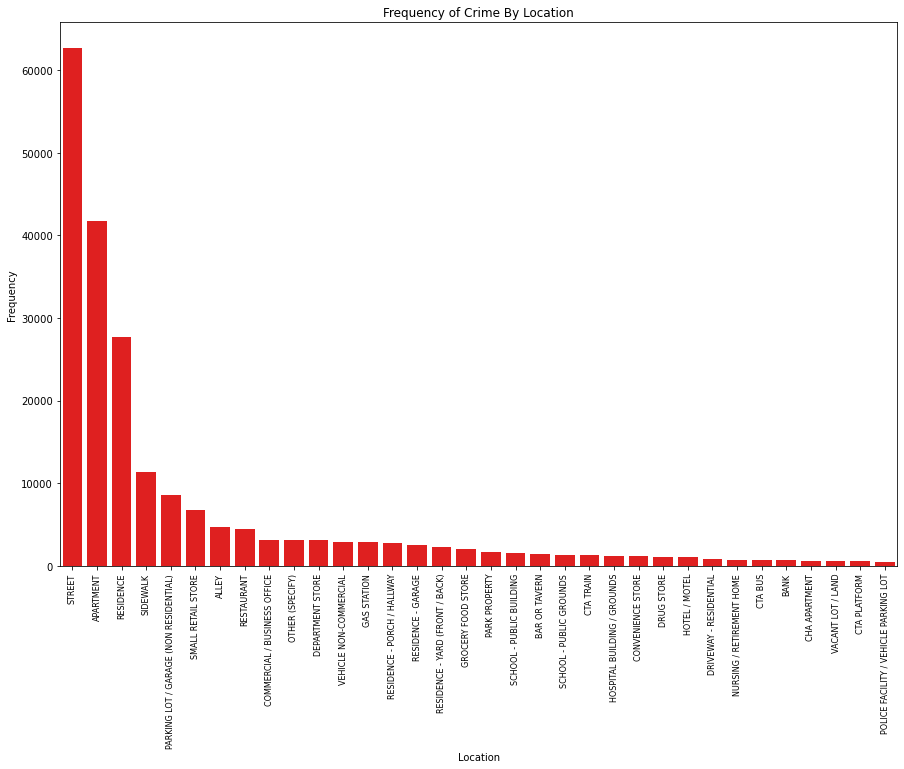

In [45]:
#Graph of crimes in locations with 500+ instances
rel_location_count = loc_crime[loc_crime>500]

figure = plt.figure(figsize=(15,10))

#Plot resulting data using Seaborn
sns.barplot(rel_location_count.index, rel_location_count.values, color = 'r')

plt.title('Frequency of Crime By Location')
plt.xlabel('Location')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Frequency')

plt.show()